In [23]:
import os
import random

import shutil

import numpy
import cv2
import pandas as pd

import yaml

from matplotlib import pyplot as plt
import IPython

In [40]:
## even not import tensorflow or pytorch....

In [24]:
%%capture

!git clone https://github.com/ultralytics/yolov5
!pip install -U pycocotools
!pip install -qr yolov5/requirements.txt
!cp yolov5/requirements.txt ./

quiet and requirement
we are using the yolov5 but we already have yolo v9 now

In [25]:
FOLDER = "/kaggle/working/dataset/"
IMAGES = FOLDER + "images/"
LABELS = FOLDER + "labels/"

SOURCE_IMAGES = "/kaggle/input/car-object-detection/data/training_images"

In [26]:
labels = pd.read_csv("/kaggle/input/car-object-detection/data/train_solution_bounding_boxes (1).csv")

In [27]:
if not os.path.exists(IMAGES):
    os.makedirs(IMAGES)

for file in os.listdir(SOURCE_IMAGES):
    shutil.copy(os.path.join(SOURCE_IMAGES, file), IMAGES)

In [28]:
for _, row in labels.iterrows():
    
    image_file = row['image']
    class_id = "0"
    x = row['xmin']
    y = row['ymin']
    width = row['xmax'] - row['xmin']
    height = row['ymax'] - row['ymin']

    x_center = x + (width / 2)
    y_center = y + (height / 2)
    x_center /= 676
    y_center /= 380
    width /= 676
    height /= 380
    
    if not os.path.exists(LABELS):
        os.makedirs(LABELS)

    annotation_file = os.path.join(LABELS) + image_file.replace('.jpg', '.txt')
    
    with open(annotation_file, 'a') as ann_file:
        ann_file.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

make sure we are using the four right parameters for YOLO
and also make sure you have done with the standardization

In [29]:
data = {
    'path': FOLDER,
    'train': IMAGES,
    'val': IMAGES,
    'nc': 1,
    'names': ['satellite']
}

In [30]:
with open(os.path.join("/kaggle/working/yolov5", "data.yaml"), 'w') as file:
    yaml.dump(data, file)

this a super crazy way to use yaml...
also disabled the wandb... 

In [31]:
%cd /kaggle/working/yolov5
os.environ['WANDB_MODE'] = 'disabled'
#image pixel 676, batchsize 16, 3 epochs and using the data.yaml file....
!python train.py --img 676 --batch 16 --epochs 3 --data data.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt

/kaggle/working/yolov5
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=676, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-294-gdb125a20 Python-3.10.10 torch-2.0.0 CUDA

based on the dectect py, we are starting!!!!

In [41]:
!pwd

/kaggle/working/yolov5


In [32]:
!python detect.py --source /kaggle/input/car-object-detection/data/testing_images --weights runs/train/exp/weights/best.pt

detect: weights=['runs/train/exp/weights/best.pt'], source=/kaggle/input/car-object-detection/data/testing_images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-294-gdb125a20 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/175 /kaggle/input/car-object-detection/data/testing_images/vid_5_25100.jpg: 384x640 (no detections), 40.7ms
image 2/175 /kaggle/input/car-object-detection/data/testing_images/vid_5_25120.jpg: 384x640 (no detections), 6.5ms
image 3/175 /kaggle/input/car-object-detection/data/tes

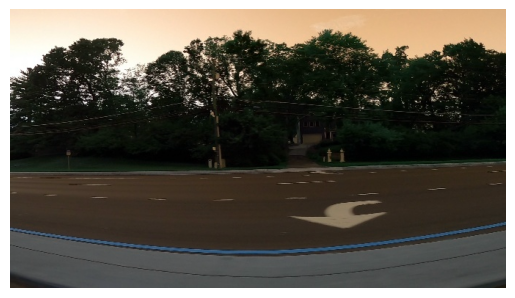

In [36]:
plt.axis('off')
plt.imshow(cv2.imread("/kaggle/working/yolov5/runs/detect/exp/vid_5_30020.jpg"))

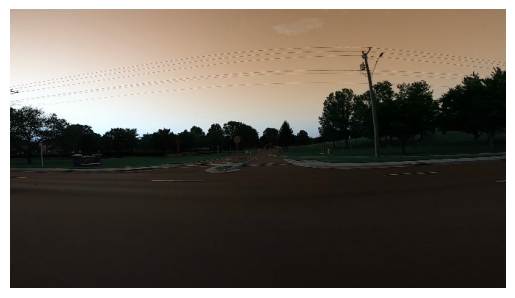

In [37]:
plt.axis('off')
plt.imshow(cv2.imread("/kaggle/working/yolov5/runs/detect/exp/vid_5_31360.jpg"))

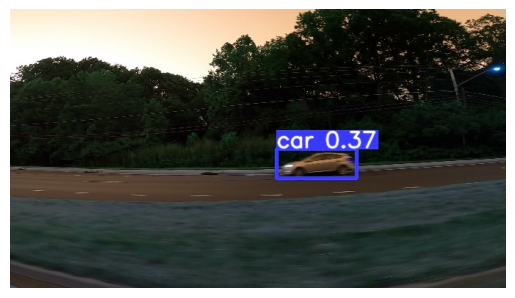

In [39]:
plt.axis('off')
plt.imshow(cv2.imread("/kaggle/working/yolov5/runs/detect/exp/vid_5_29460.jpg"))

done!!!